# Projet_ML
## 2022-2023
---

### **Nom & Prénom des étudiants : Mayssa Hemdana ;  Eya Besbes**
---

**Importation des bibliothèques**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler

**Assemblage Google Drive dans Colaboratory**

In [ ]:
train=pd.read_csv("/content/sample_data/train_Insurance.csv")
test=pd.read_csv("/content/sample_data/test_Insurance.csv")

**Lecture des fichiers *train_Insurance.csv* & *test_Insurance.csv***


In [ ]:
train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [ ]:
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,oui


In [ ]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


### **Analyse de données & Data preprocessing** 

In [ ]:
print(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB
None


,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


In [ ]:
print ( " \n\n train set \n\n")
print(train['Insured_Period'].value_counts())
print(train['Building Dimension'].value_counts())
print(train['Residential'].value_counts())
print(train['Building_Painted'].value_counts())
print(train['Building_Fenced'].value_counts())
print(train['Garden'].value_counts())
print(train['Building_Type'].value_counts())
print(train['NumberOfWindows'].value_counts())
print(train['Geo_Code'].value_counts())
print(train['Claim'].value_counts())

print (" \n\n test set \n\n")
print(test['Insured_Period'].value_counts())
print(test['Residential'].value_counts())
print(test['Building_Painted'].value_counts())
print(test['Building_Fenced'].value_counts())
print(test['Garden'].value_counts())
print(test['Building_Type'].value_counts())
print(test['NumberOfWindows'].value_counts())
print(test['Geo_Code'].value_counts())
print(test['Claim'].value_counts())


 

 train set 


1.0    3706
0.5    1306
Name: Insured_Period, dtype: int64
400.0     97
450.0     89
600.0     88
500.0     83
300.0     78
          ..
1423.0     1
2530.0     1
653.0      1
1934.0     1
173.0      1
Name: Building Dimension, Length: 1683, dtype: int64
0    3503
1    1509
Name: Residential, dtype: int64
V    3763
N    1249
Name: Building_Painted, dtype: int64
N    2535
V    2477
Name: Building_Fenced, dtype: int64
O    2532
V    2476
Name: Garden, dtype: int64
Non-combustible    2310
Fire-resistive     1205
Ordinary            854
Wood-framed         643
Name: Building_Type, dtype: int64
without    2476
4           667
3           600
5           436
2           245
6           225
7           142
8            84
>=10         53
1            49
9            35
Name: NumberOfWindows, dtype: int64
6088     102
33063     97
6083      83
31555     62
13206     59
        ... 
42332      1
60057      1
77285      1
74278      1
94059      1
Name: Geo_Code, Length: 1115, d

In [ ]:
print(" \n Nombre des valeurs manquantes dans chaque colonnes\n ")
missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()
print("\n Train set\n\n " ,missing_values_train)
print(" \n\n test set\n\n ",missing_values_test)

 
 Nombre des valeurs manquantes dans chaque colonnes
 

 Train set

  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64
 

 test set

  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64


In [ ]:

print(" \npourcentage des valeurs manquantes dans chaque colonnes\n ")
missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()
print("\n Train set pourcentage \n\n " ,100*missing_values_train/len(train))
print(" \n\n test set pourcentage \n\n ",100*missing_values_test/len(test))

 
pourcentage des valeurs manquantes dans chaque colonnes
 

 Train set pourcentage 

  Customer Id           0.000000
YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building_Painted      0.000000
Building_Fenced       0.000000
Garden                0.079808
Settlement            0.000000
Building Dimension    1.536313
Building_Type         0.000000
NumberOfWindows       0.000000
Geo_Code              1.456504
Claim                 0.000000
dtype: float64
 

 test set pourcentage 

  Customer Id           0.000000
YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building_Painted      0.000000
Building_Fenced       0.000000
Garden                0.139730
Settlement            0.000000
Building Dimension    1.350722
Building_Type         0.000000
NumberOfWindows       0.000000
Geo_Code              1.350722
Claim                 0.000000
dtype: float64


In [ ]:
train['Garden'].fillna(train['Garden'].mode()[0], inplace=True)
test['Garden'].fillna(test['Garden'].mode()[0], inplace=True)
train['Geo_Code'].fillna(train['Geo_Code'].mode()[0], inplace=True)
test['Geo_Code'].fillna(test['Geo_Code'].mode()[0], inplace=True)
train['Building Dimension'].fillna(train['Building Dimension'].mean(), inplace=True)
test['Building Dimension'].fillna(test['Building Dimension'].mean(), inplace=True)


In [ ]:
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.000000,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.000000,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.000000,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.000000,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.000000,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.000000,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,1899.700189,Non-combustible,without,6088,non
2144,H18804,2014,1.0,0,V,N,O,R,730.000000,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.000000,Non-combustible,without,69091,oui


In [ ]:
print(" \n Nombre des valeurs manquantes dans chaque colonnes\n ")
missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()
print("\n Train set\n\n " ,missing_values_train)
print(" \n\n test set\n\n ",missing_values_test)

 
 Nombre des valeurs manquantes dans chaque colonnes
 

 Train set

  Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64
 

 test set

  Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [ ]:
duplicates = train.duplicated()
print(duplicates)
print("\nNumber of duplicates:", duplicates.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
5007    False
5008    False
5009    False
5010    False
5011    False
Length: 5012, dtype: bool

Number of duplicates: 0


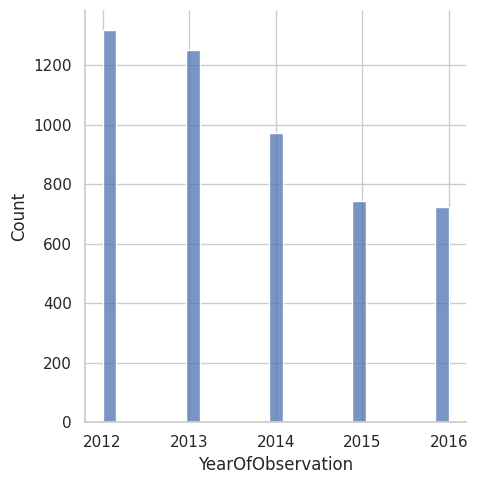

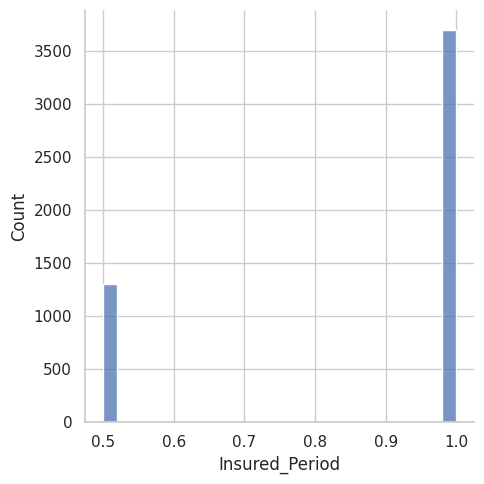

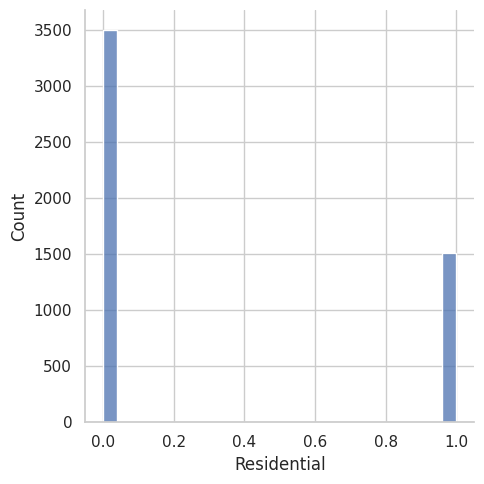

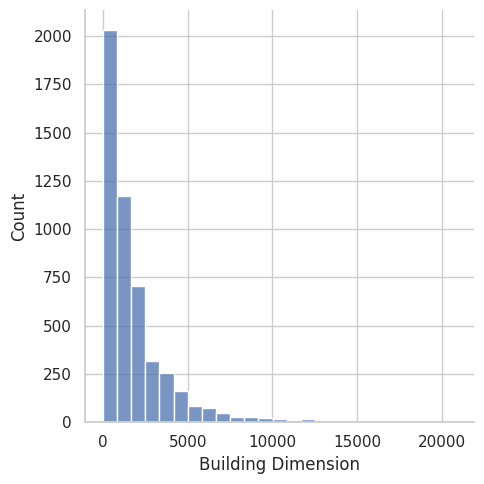

In [ ]:
for i in train:
    if not (train[i].dtypes== 'object'):
        sns.displot(train.loc[:, i], bins=25)
        plt.show()

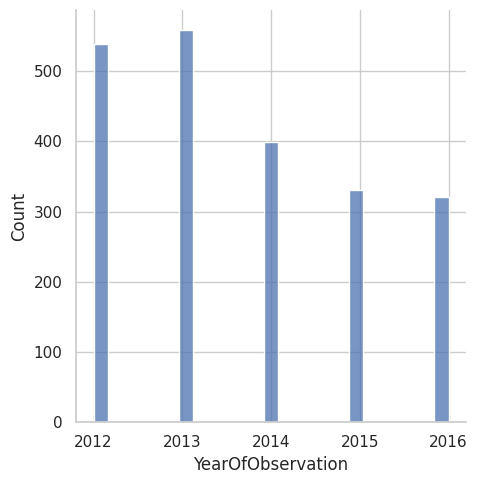

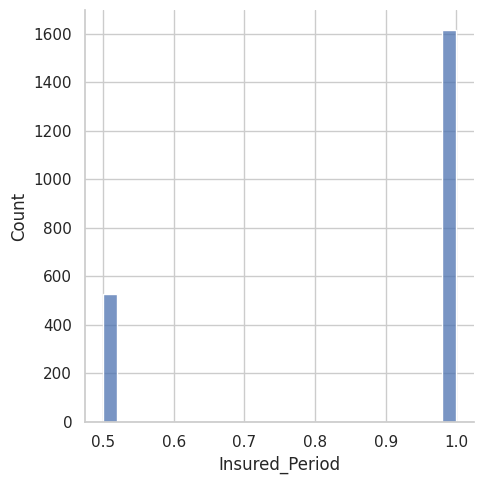

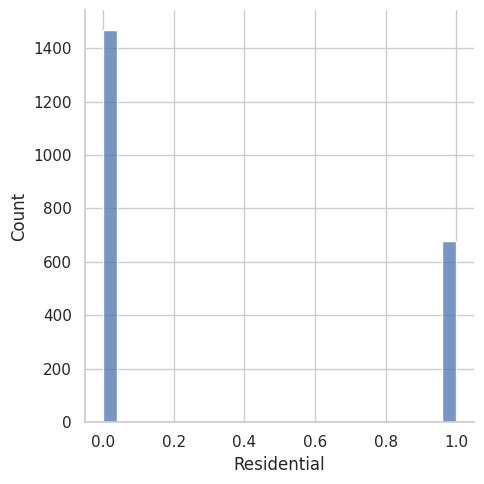

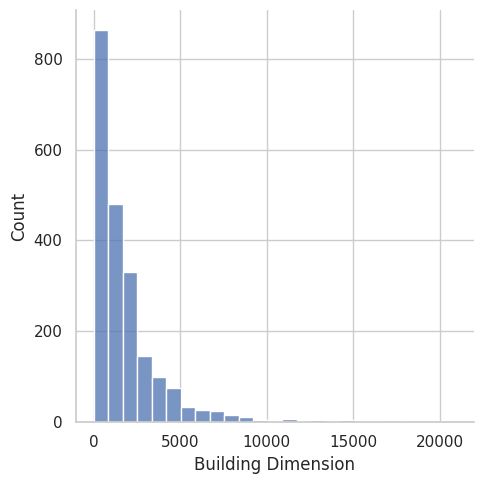

In [ ]:
for i in test:
    if not (test[i].dtypes== 'object'):
        sns.displot(test.loc[:, i], bins=25)
        plt.show()

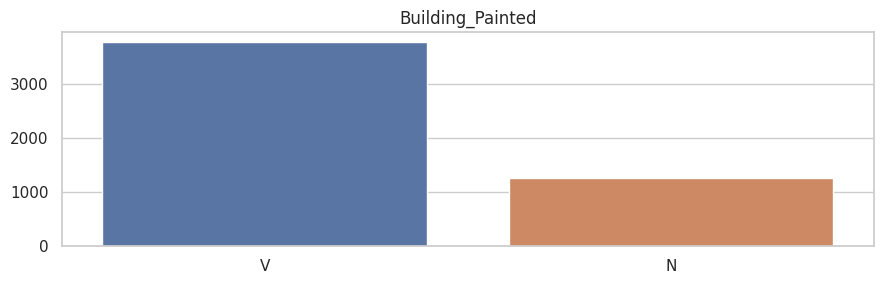

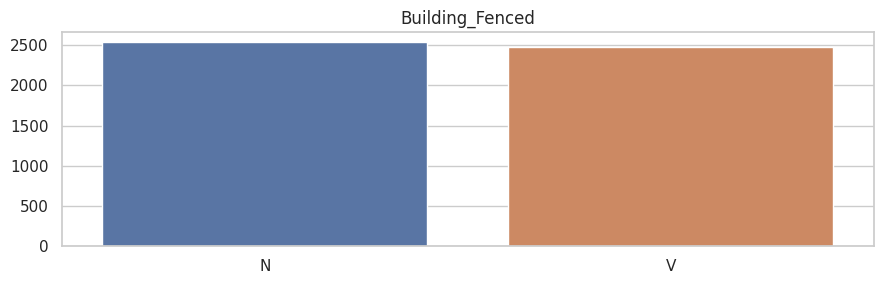

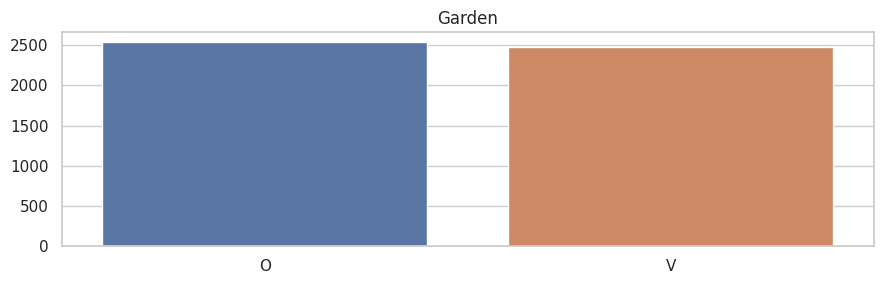

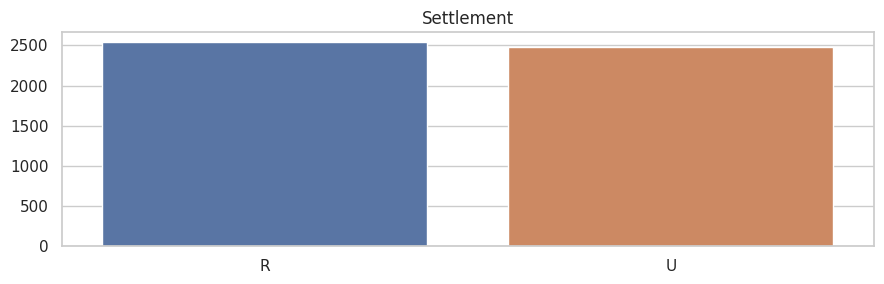

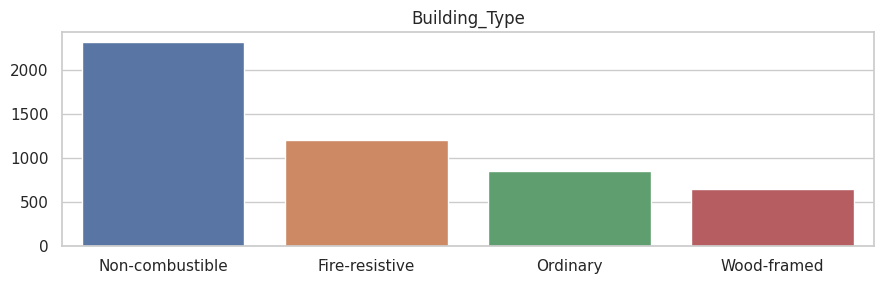

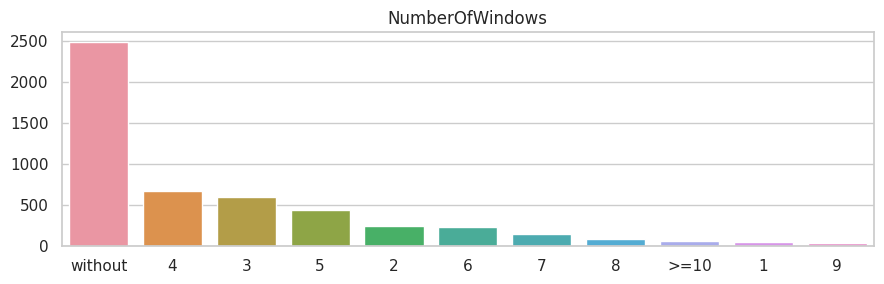

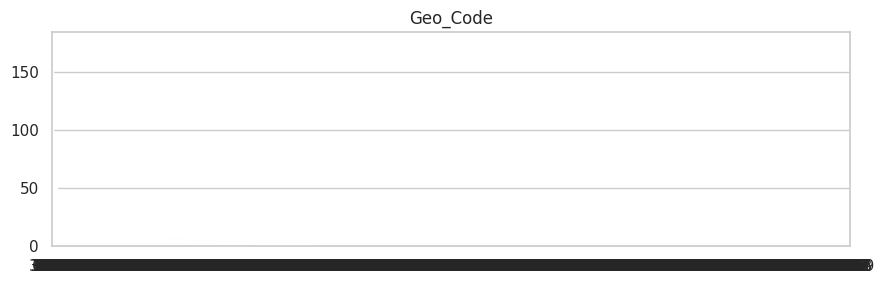

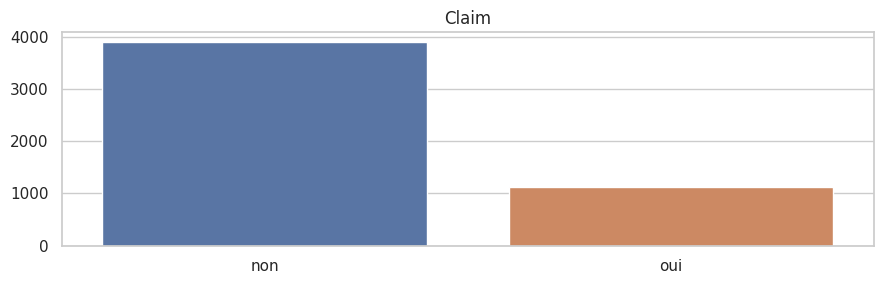

In [ ]:
for i in train.drop(['Customer Id'],axis=1):
    if (train[i].dtypes== 'object'):
        plt.figure(figsize=(9,3))
        sns.barplot(x=train[i].value_counts().index ,y=train[i].value_counts().values )
        plt.title(i)
        plt.tight_layout()
        plt.show()

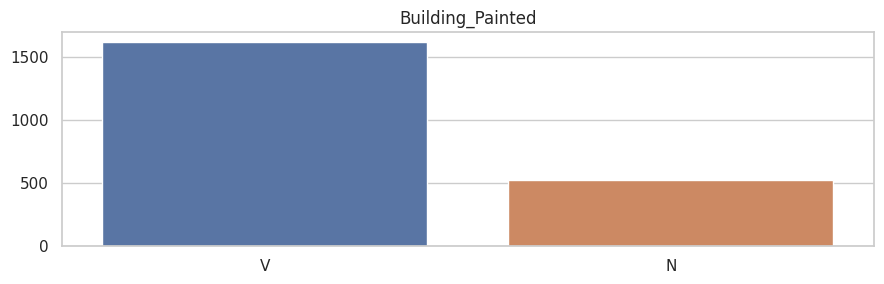

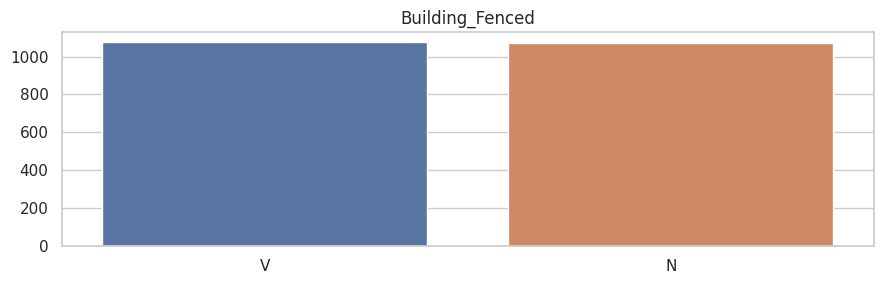

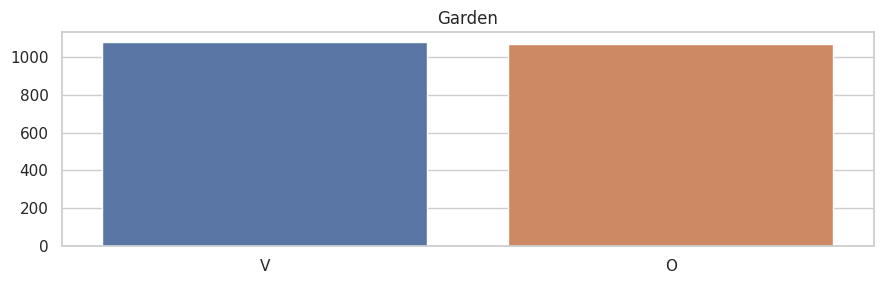

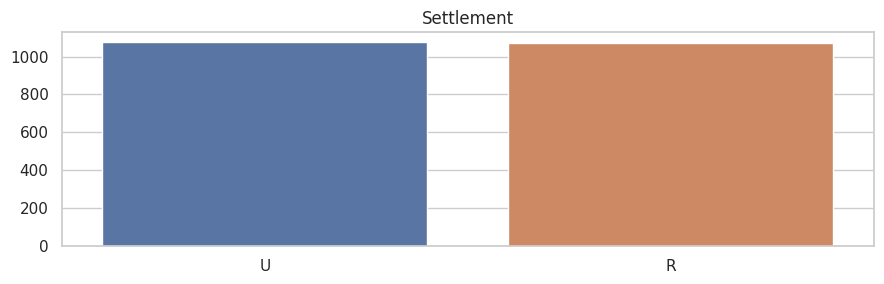

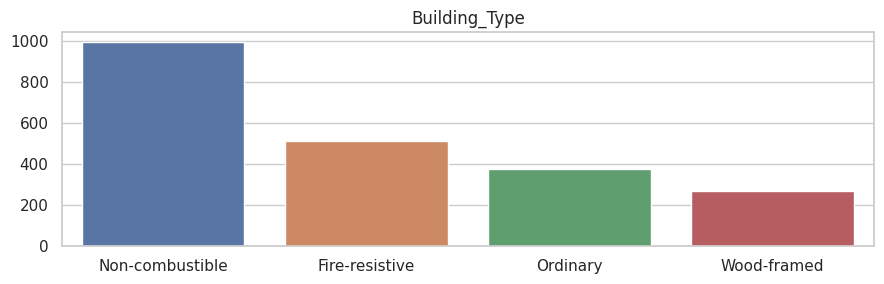

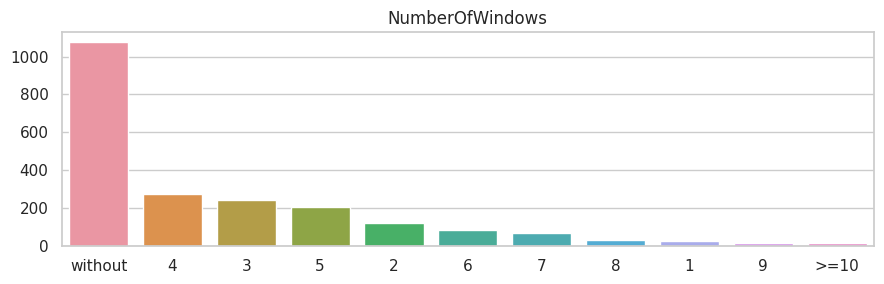

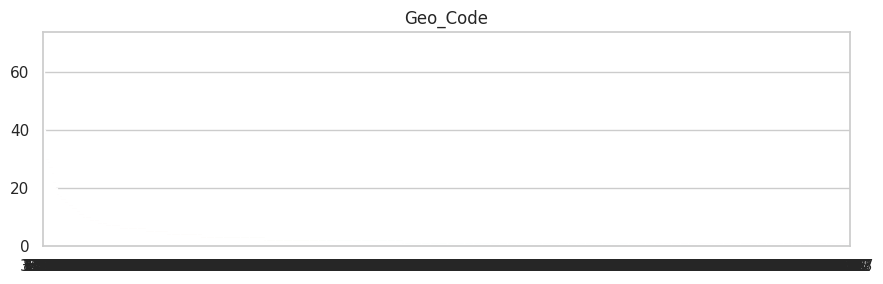

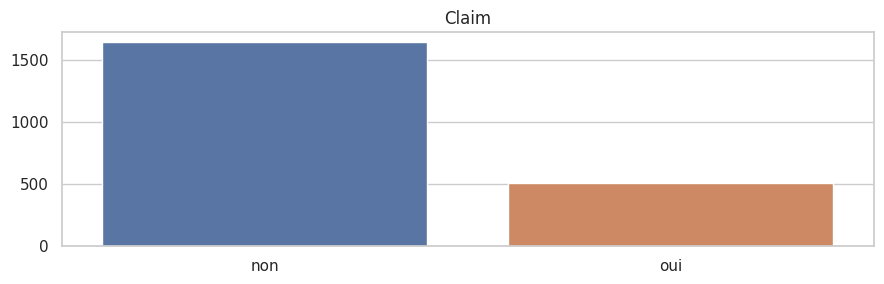

In [ ]:
for i in test.drop(['Customer Id'],axis=1):
    if (test[i].dtypes== 'object'):
        plt.figure(figsize=(9,3))
        sns.barplot(x=test[i].value_counts().index ,y=test[i].value_counts().values )
        plt.title(i)
        plt.tight_layout()
        plt.show()

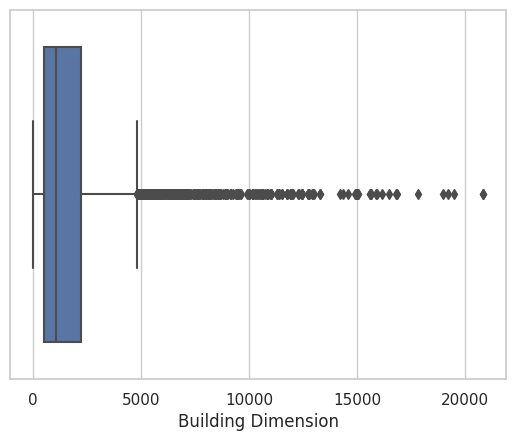

In [ ]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train['Building Dimension'])
plt.show()

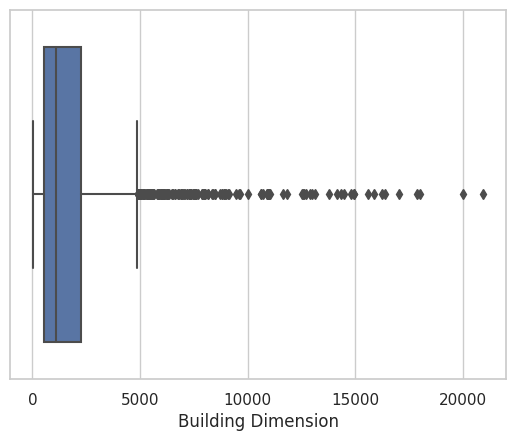

In [ ]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=test['Building Dimension'])
plt.show()

In [ ]:
valeurs_aberrantes = train[train['Building Dimension'] > train['Building Dimension'].quantile(0.75) + 1.5*(train['Building Dimension'].quantile(0.75) - train['Building Dimension'].quantile(0.25))]['Building Dimension']

# Remplacer les valeurs aberrantes par la médiane des valeurs non aberrantes
train.loc[train['Building Dimension'].isin(valeurs_aberrantes), 'Building Dimension'] = np.median(train['Building Dimension'])

# Afficher le DataFrame mis à jour
train['Building Dimension']

0       1240.000000
1        900.000000
2       1100.000000
3        600.000000
4        900.000000
           ...     
5007     550.000000
5008    1000.000000
5009     480.000000
5010     536.000000
5011    1876.898683
Name: Building Dimension, Length: 5012, dtype: float64

In [ ]:
valeurs_aberrantes = test[test['Building Dimension'] > test['Building Dimension'].quantile(0.75) + 1.5*(test['Building Dimension'].quantile(0.75) - test['Building Dimension'].quantile(0.25))]['Building Dimension']

# Remplacer les valeurs aberrantes par la médiane des valeurs non aberrantes
test.loc[test['Building Dimension'].isin(valeurs_aberrantes), 'Building Dimension'] = np.median(test['Building Dimension'])

# Afficher le DataFrame mis à jour
test['Building Dimension'].value_counts()

1117.000000    168
400.000000      53
300.000000      40
500.000000      37
1899.700189     29
              ... 
3241.000000      1
635.000000       1
288.000000       1
838.000000       1
862.000000       1
Name: Building Dimension, Length: 834, dtype: int64

In [ ]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,5012.000000
mean,2013.660215,0.869713,0.301077,1335.372346
std,1.383134,0.219496,0.458772,1060.123309
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,530.000000
50%,2013.000000,1.000000,0.000000,1100.000000
75%,2015.000000,1.000000,1.000000,1842.750000
max,2016.000000,1.000000,1.000000,4830.000000


In [ ]:
test.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension
count,2147.000000,2147.000000,2147.000000,2147.000000
mean,2013.691197,0.876805,0.315789,1359.153379
std,1.385631,0.215504,0.464938,1069.585764
min,2012.000000,0.500000,0.000000,10.000000
25%,2012.000000,1.000000,0.000000,541.000000
50%,2013.000000,1.000000,0.000000,1117.000000
75%,2015.000000,1.000000,1.000000,1883.500000
max,2016.000000,1.000000,1.000000,4863.000000


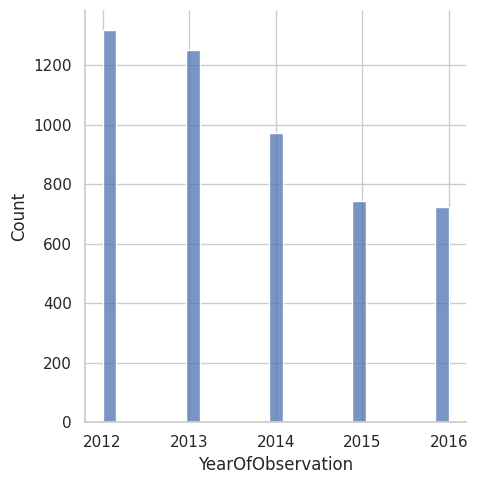

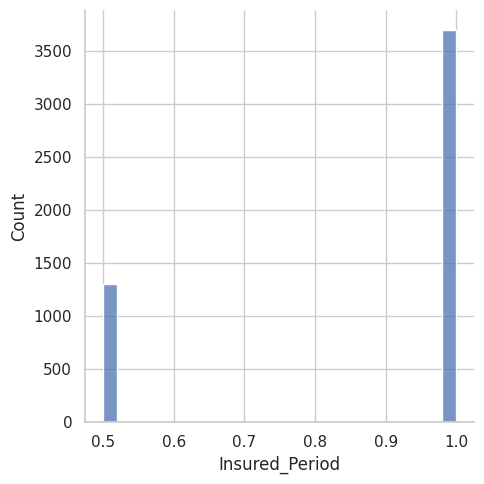

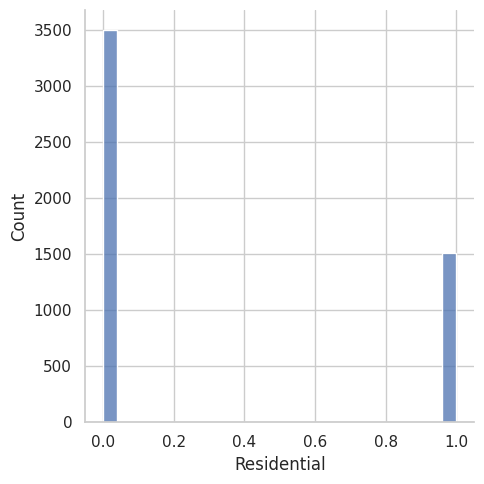

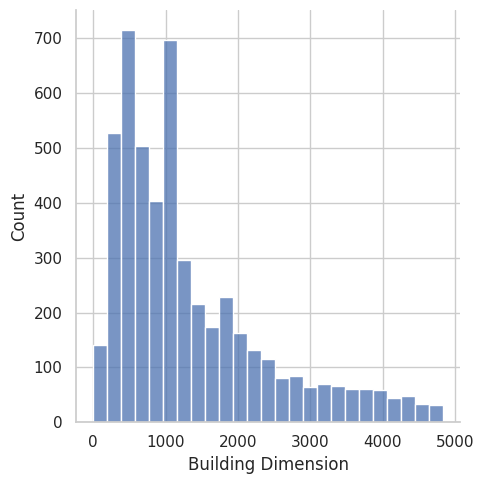

In [ ]:
for i in train:
    if not (train[i].dtypes== 'object'):
        sns.displot(train.loc[:, i], bins=25)
        plt.show()

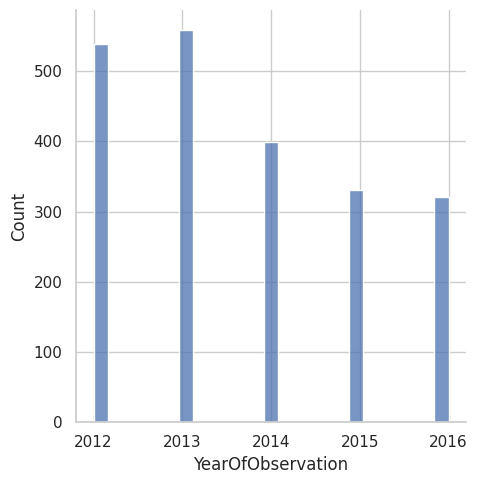

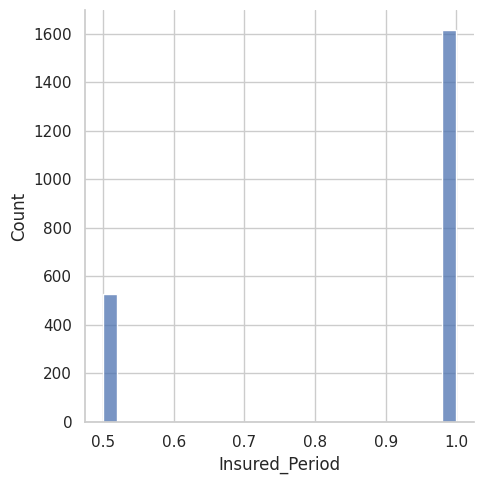

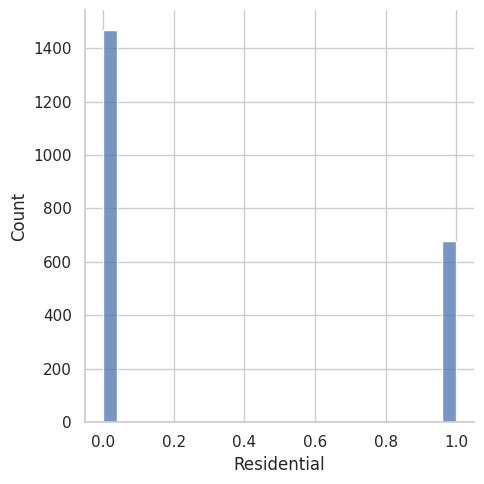

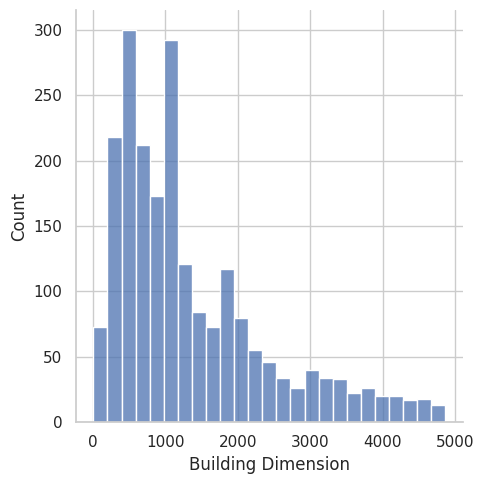

In [ ]:
for i in test:
    if not (test[i].dtypes== 'object'):
        sns.displot(test.loc[:, i], bins=25)
        plt.show()

In [ ]:

enc = LabelEncoder()
train[['Building_Painted']]=pd.DataFrame(enc.fit_transform(train[['Building_Painted']]), columns= ['Building_Painted'])
train[['Building_Painted']]
test[['Building_Painted']]=pd.DataFrame(enc.fit_transform(test[['Building_Painted']]), columns= ['Building_Painted'])
test[['Building_Painted']].isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Building_Painted    0
dtype: int64

In [ ]:
train[['Building_Fenced']]=pd.DataFrame(enc.fit_transform(train[['Building_Fenced']]), columns= ['Building_Fenced'])
train[['Building_Fenced']]
test[['Building_Fenced']]=pd.DataFrame(enc.fit_transform(test[['Building_Fenced']]), columns= ['Building_Fenced'])
test[['Building_Fenced']].isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Building_Fenced    0
dtype: int64

In [ ]:
train[['Garden']]=pd.DataFrame(enc.fit_transform(train[['Garden']]), columns= ['Garden'])
train[['Garden']]
test[['Garden']]=pd.DataFrame(enc.fit_transform(test[['Garden']]), columns= ['Garden'])
test[['Garden']].isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Garden    0
dtype: int64

In [ ]:
train[['Settlement']]=pd.DataFrame(enc.fit_transform(train[['Settlement']]), columns= ['Settlement'])
train[['Settlement']]
test[['Settlement']]=pd.DataFrame(enc.fit_transform(test[['Settlement']]), columns= ['Settlement'])
test[['Settlement']].isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Settlement    0
dtype: int64

In [ ]:
train[['Building_Type']]=pd.DataFrame(enc.fit_transform(train[['Building_Type']]), columns= ['Building_Type'])
train[['Building_Type']]
test[['Building_Type']]=pd.DataFrame(enc.fit_transform(test[['Building_Type']]), columns= ['Building_Type'])
test[['Building_Type']].isnull().sum()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Building_Type    0
dtype: int64

In [ ]:
train[['Building_Type']].value_counts()

Building_Type
1                2310
0                1205
2                 854
3                 643
dtype: int64

In [ ]:
train[['NumberOfWindows']]=train[['NumberOfWindows']].replace('without', 0)
test[['NumberOfWindows']]=test[['NumberOfWindows']].replace('without', 0)
train[['NumberOfWindows']]=train[['NumberOfWindows']].replace('>=10', 10)
test[['NumberOfWindows']]=test[['NumberOfWindows']].replace('>=10', 10)
train[['NumberOfWindows']].isnull().sum()

NumberOfWindows    0
dtype: int64

In [ ]:
train[['Claim']]=pd.DataFrame(enc.fit_transform(train[['Claim']]), columns= ['Claim'])
train[['Claim']]
test[['Claim']]=pd.DataFrame(enc.fit_transform(test[['Claim']]), columns= ['Claim'])
test[['Claim']].isnull().sum()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Claim    0
dtype: int64

In [ ]:
train[['Geo_Code']]=pd.DataFrame(enc.fit_transform(train[['Geo_Code']]), columns= ['Geo_Code'])
train[['Claim']]
test[['Geo_Code']]=pd.DataFrame(enc.fit_transform(test[['Geo_Code']]), columns= ['Geo_Code'])
test[['Geo_Code']].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Geo_Code
322         70
137         40
51          39
321         30
584         30
            ..
301          1
300          1
299          1
298          1
713          1
Length: 714, dtype: int64

In [ ]:
x_train=train.drop(columns=['Claim','Customer Id'],axis=1)
y_train=train['Claim']
y_train.value_counts()

0    3886
1    1126
Name: Claim, dtype: int64

In [ ]:
x_test=test.drop(columns=['Claim','Customer Id'],axis=1)
y_test=test['Claim']
y_test.value_counts()

0    1639
1     508
Name: Claim, dtype: int64

In [ ]:
oversample = RandomOverSampler()

# fit and apply the transform
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [ ]:
x_train.corrwith(y_train)

<ipython-input-181-d5fae79373b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corrwith(y_train)


YearOfObservation    -0.023225
Insured_Period        0.076670
Residential           0.068711
Building_Painted      0.049659
Building_Fenced      -0.093627
Garden               -0.094406
Settlement           -0.094149
Building Dimension    0.205824
Building_Type         0.134948
Geo_Code              0.045594
dtype: float64

In [ ]:
train.corr()

<ipython-input-182-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Geo_Code,Claim
YearOfObservation,1.000000,-0.301636,-0.025558,0.048231,-0.123026,-0.122836,-0.122646,0.030324,-0.002341,0.014111,-0.020188
Insured_Period,-0.301636,1.000000,-0.039430,-0.036210,0.015859,0.015622,0.016294,0.000839,0.003199,-0.010140,0.070145
Residential,-0.025558,-0.039430,1.000000,-0.017048,-0.090274,-0.090012,-0.090621,0.040093,0.331869,0.306301,0.055220
Building_Painted,0.048231,-0.036210,-0.017048,1.000000,-0.578215,-0.578447,-0.578680,0.083910,-0.046469,0.021063,0.036031
Building_Fenced,-0.123026,0.015859,-0.090274,-0.578215,1.000000,0.999601,0.999202,-0.099025,-0.022468,-0.057845,-0.069308
Garden,-0.122836,0.015622,-0.090012,-0.578447,0.999601,1.000000,0.999601,-0.099087,-0.022389,-0.057889,-0.070050
Settlement,-0.122646,0.016294,-0.090621,-0.578680,0.999202,0.999601,1.000000,-0.099292,-0.022310,-0.058324,-0.069836
Building Dimension,0.030324,0.000839,0.040093,0.083910,-0.099025,-0.099087,-0.099292,1.000000,-0.028599,-0.001487,0.188908
Building_Type,-0.002341,0.003199,0.331869,-0.046469,-0.022468,-0.022389,-0.022310,-0.028599,1.000000,0.291660,0.114039
Geo_Code,0.014111,-0.010140,0.306301,0.021063,-0.057845,-0.057889,-0.058324,-0.001487,0.291660,1.000000,0.035347


In [ ]:
x_test.corrwith(y_test)

<ipython-input-183-a588669cd308>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_test.corrwith(y_test)


YearOfObservation    -0.008012
Insured_Period        0.053832
Residential           0.081526
Building_Painted      0.015090
Building_Fenced      -0.011219
Garden               -0.010583
Settlement           -0.011219
Building Dimension    0.217647
Building_Type         0.108189
Geo_Code              0.063175
dtype: float64

In [ ]:
test.corr()

<ipython-input-184-c06d3b70ad5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.corr()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Geo_Code,Claim
YearOfObservation,1.000000,-0.271027,-0.074958,0.077257,-0.114547,-0.115942,-0.114547,-0.014887,0.023836,-0.007223,-0.008012
Insured_Period,-0.271027,1.000000,-0.006854,0.002274,-0.015947,-0.016511,-0.015947,0.031093,-0.012057,0.014054,0.053832
Residential,-0.074958,-0.006854,1.000000,-0.070417,-0.064445,-0.064340,-0.064445,0.029305,0.339664,0.344747,0.081526
Building_Painted,0.077257,0.002274,-0.070417,1.000000,-0.566483,-0.564890,-0.566483,0.055986,-0.052765,-0.001138,0.015090
Building_Fenced,-0.114547,-0.015947,-0.064445,-0.566483,1.000000,0.997209,1.000000,-0.118637,-0.016033,-0.047569,-0.011219
Garden,-0.115942,-0.016511,-0.064340,-0.564890,0.997209,1.000000,0.997209,-0.117514,-0.017580,-0.047778,-0.010583
Settlement,-0.114547,-0.015947,-0.064445,-0.566483,1.000000,0.997209,1.000000,-0.118637,-0.016033,-0.047569,-0.011219
Building Dimension,-0.014887,0.031093,0.029305,0.055986,-0.118637,-0.117514,-0.118637,1.000000,-0.007188,0.017698,0.217647
Building_Type,0.023836,-0.012057,0.339664,-0.052765,-0.016033,-0.017580,-0.016033,-0.007188,1.000000,0.274357,0.108189
Geo_Code,-0.007223,0.014054,0.344747,-0.001138,-0.047569,-0.047778,-0.047569,0.017698,0.274357,1.000000,0.063175


In [ ]:
#train=train.drop(columns=['Customer Id','YearOfObservation','Insured_Period'],axis=1)
#train

In [ ]:
#test=test.drop(columns=['Customer Id','YearOfObservation','Insured_Period'],axis=1)
#test

---

### **Apprentissage automatique : construction des modèles** 

## Le modéle ***MLPClassifier*** 




In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score, ConfusionMatrixDisplay

In [ ]:
NN = MLPClassifier(solver="sgd",early_stopping=True) #verbose=True
NN.fit(x_train,y_train)

MLPClassifier(early_stopping=True, solver='sgd')

In [ ]:
y_pred = NN.predict(x_test)

In [ ]:
# affichage du degré de précision de l'apprentissage
# affichage du degré de précision du test
train_score=NN.score(x_train, y_train)*100
test_score=NN.score(x_test,y_test)*100
print("Training set score: ", train_score  )
print("Test set score: " ,test_score)

Training set score:  63.098301595470915
Test set score:  57.56870051234281


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.51      0.65      1639
           1       0.33      0.78      0.46       508

    accuracy                           0.58      2147
   macro avg       0.61      0.64      0.56      2147
weighted avg       0.75      0.58      0.61      2147



In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
recall=recall_score(y_true=y_test,y_pred=y_pred, average='weighted')*100
precision= precision_score(y_test,y_pred,average='weighted')*100

In [ ]:
# affichage des résultats calculés dans l'étape 7:
print("Accuracy for Neural Network is:",accuracy)
print("the recall for Neural Network is", recall)
print("the precision for this Neural Network is ", precision)
print("Confusion Matrix",confusion_mat)


Accuracy for Neural Network is: 57.56870051234281
the recall for Neural Network is 57.56870051234281
the precision for this Neural Network is  75.06325708716547
Confusion Matrix [[842 797]
 [114 394]]


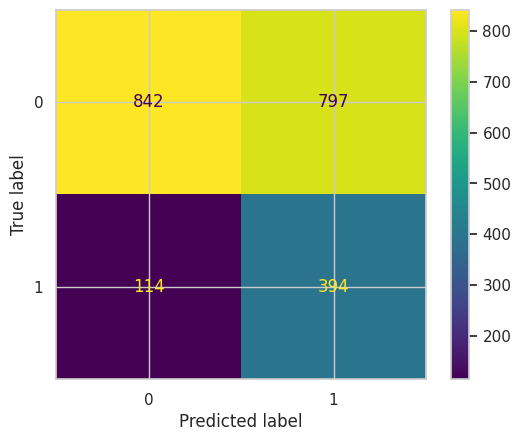

In [ ]:
# 2 ème méthode pour afficher une matrice de confusion:
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()

## ***Le modèle RandomForestClassifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize model
rfc = RandomForestClassifier()

# Train the model
rfc.fit(x_train, y_train)

# Predict on the test set
y_pred = rfc.predict(x_test)


In [ ]:
# affichage du degré de précision de l'apprentissage
# affichage du degré de précision du test
train_score=rfc.score(x_train, y_train)*100
test_score=rfc.score(x_test,y_test)*100
print("Training set score: ", train_score  )
print("Test set score: " ,test_score)

Training set score:  99.61399897066391
Test set score:  72.84583139264089


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1639
           1       0.39      0.27      0.32       508

    accuracy                           0.73      2147
   macro avg       0.59      0.57      0.58      2147
weighted avg       0.70      0.73      0.71      2147



In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
recall=recall_score(y_true=y_test,y_pred=y_pred, average='weighted')*100
precision= precision_score(y_test,y_pred,average='weighted')*100

In [ ]:
# affichage des résultats calculés dans l'étape 7:
print("Accuracy ",accuracy)
print("the recall", recall)
print("the precision  ", precision)
print("Confusion Matrix",confusion_mat)

Accuracy  72.84583139264089
the recall 72.84583139264089
the precision   69.95413438459654
Confusion Matrix [[1425  214]
 [ 369  139]]


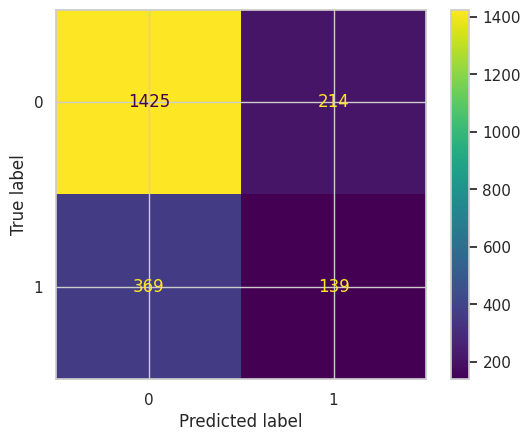

In [ ]:
# 2 ème méthode pour afficher une matrice de confusion:
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()

## **Le modèle LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

In [ ]:
# affichage du degré de précision de l'apprentissage
# affichage du degré de précision du test
train_score=model.score(x_train, y_train)*100
test_score=model.score(x_test,y_test)*100
print("Training set score: ", train_score  )
print("Test set score: " ,test_score)

Training set score:  62.583633556356155
Test set score:  67.48952026082907


In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
recall=recall_score(y_true=y_test,y_pred=y_pred, average='weighted')*100
precision= precision_score(y_test,y_pred,average='weighted')*100

In [ ]:
# affichage des résultats calculés dans l'étape 7:
print("Accuracy ",accuracy)
print("the recall ", recall)
print("the precision  ", precision)
print("Confusion Matrix",confusion_mat)

Accuracy  67.48952026082907
the recall  67.48952026082907
the precision   72.04803498929296
Confusion Matrix [[1184  455]
 [ 243  265]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1639
           1       0.37      0.52      0.43       508

    accuracy                           0.67      2147
   macro avg       0.60      0.62      0.60      2147
weighted avg       0.72      0.67      0.69      2147



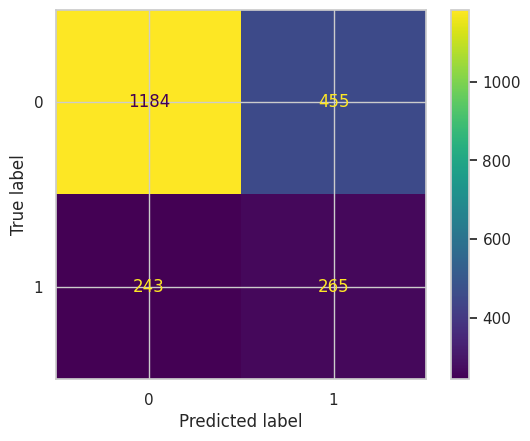

In [ ]:
# 2 ème méthode pour afficher une matrice de confusion:
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()

## **Le modèle DesicionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create decision tree classifier object
clf = DecisionTreeClassifier()

# Train decision tree classifier on the training set
clf.fit(x_train, y_train)

# Predict on the testing set
y_pred = clf.predict(x_test)

In [ ]:
# affichage du degré de précision de l'apprentissage
# affichage du degré de précision du test
train_score=clf.score(x_train, y_train)*100
test_score=clf.score(x_test,y_test)*100
print("Training set score: ", train_score  )
print("Test set score: " ,test_score)

Training set score:  99.61399897066391
Test set score:  67.72240335351654


In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
recall=recall_score(y_true=y_test,y_pred=y_pred, average='weighted')*100
precision= precision_score(y_test,y_pred,average='weighted')*100

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1639
           1       0.30      0.27      0.28       508

    accuracy                           0.68      2147
   macro avg       0.54      0.54      0.54      2147
weighted avg       0.67      0.68      0.67      2147



In [ ]:
# affichage des résultats calculés dans l'étape 7:
print("Accuracy ",accuracy)
print("the recall ", recall)
print("the precision  ", precision)
print("Confusion Matrix",confusion_mat)

Accuracy  67.72240335351654
the recall  67.72240335351654
the precision   66.53046487526068
Confusion Matrix [[1319  320]
 [ 373  135]]


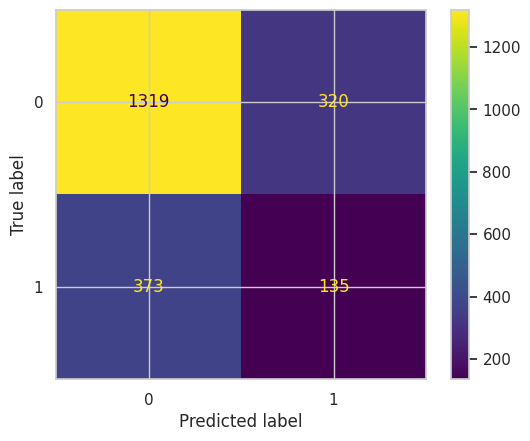

In [ ]:
# 2 ème méthode pour afficher une matrice de confusion:
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()

---

---